# Gesundheitsministerium and ECDC Data

## Setup

### Imports

In [1]:
%matplotlib notebook

import logging

from matplotlib import pyplot as plt
from helper import *
logging.basicConfig(level=logging.INFO)
plt.style.use('seaborn-darkgrid')

df_ecdc = ecdc()
logging.info('ECDC: \n%s', df_ecdc.columns)

df_at = at()
logging.info('AT: \n%s', df_at.columns);

INFO:root:ECDC: 
Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')
INFO:root:AT: 
Index(['time', 'tägliche Erkrankungen', 'Timestamp', 'weekday'], dtype='object')


## Comparison - number of cases

<IPython.core.display.Javascript object>


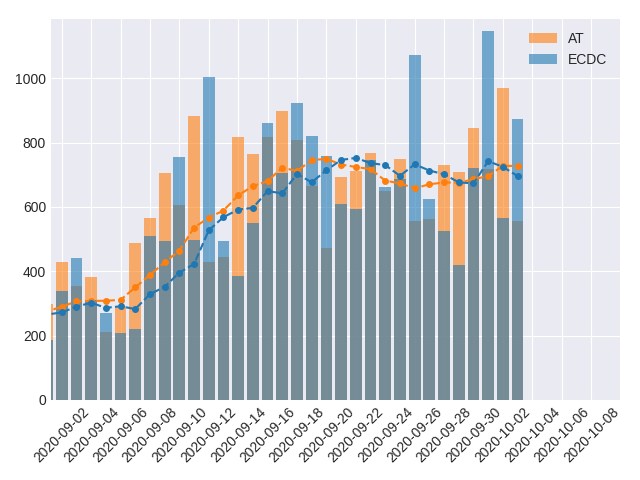

In [4]:
f,ax = plt.subplots()
# ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='recorded',  alpha=0.6, color='C1')

ax.plot(df_at.time, df_at['tägliche Erkrankungen'].rolling(7).mean(),  marker='o', markersize=4, linestyle='--', color='C1')

ax.bar(df_at.time, df_at['tägliche Erkrankungen'],label='AT',  alpha=0.6, color='C1')
selection = df_ecdc[df_ecdc.geoId=='AT'].sort_values(by=['year','month','day'], ascending=True)
ax.bar(selection.dateRep, selection['cases'],label='ECDC',  alpha=0.6, color='C0')
ax.plot(selection.dateRep, selection['cases'].rolling(7).mean(), marker='o', markersize=4, linestyle='--',color='C0')
# plt.yscale('log')

ax.xaxis.set_major_locator(plt.MaxNLocator(20));

plt.xticks(rotation=45);
plt.legend(loc='best')
plt.tight_layout()



In [3]:
df_at['tägliche Erkrankungen'].sum(), df_ecdc[df_ecdc.geoId=='AT'].cases.sum()


(48184, 47189)

In [33]:
df_ecdc[df_ecdc.geoId=='AT'].sort_values('dateRep')[['dateRep', 'cases', 'deaths','popData2019', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000' ]].tail(6)

,dateRep,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
2486,2020-09-27,623,1,8858775.0,112.75825382
2485,2020-09-28,526,0,8858775.0,114.36118425
2484,2020-09-29,419,3,8858775.0,112.89371273
2483,2020-09-30,722,6,8858775.0,111.33593527
2482,2020-10-01,1146,3,8858775.0,116.32533844
2481,2020-10-02,564,3,8858775.0,112.28414764


In [22]:
df_at.sort_values('time').tail(5)

,time,tägliche Erkrankungen,Timestamp,weekday
215,2020-09-27,552,2020-10-02T11:00:00,6
216,2020-09-28,725,2020-10-02T11:00:00,0
217,2020-09-29,705,2020-10-02T11:00:00,1
218,2020-09-30,817,2020-10-02T11:00:00,2
219,2020-10-01,681,2020-10-02T11:00:00,3


In [14]:
df_at.agg(
        {'tägliche Erkrankungen': ['sum', last_7_days_sum,  rolling_avg, latest,  'max' ],
        'time': ['min', 'max']} )


,tägliche Erkrankungen,time
last_7_days_sum,4780.0,NaT
latest,681.0,NaT
max,1065.0,2020-10-01
min,NaN,2020-02-25
rolling_avg,683.0,NaT
sum,46547.0,NaT
